In [1]:
1 + 1

2

In [2]:
import numpy as np
import sympy as sym
import sympy.physics.mechanics as me

In [3]:
me.init_vprinting(use_latex='mathjax')

In [4]:
g = sym.symbols('g')

In [5]:
g

g

In [6]:
mA, mB, lB = sym.symbols('m_A, m_B, L_B')

In [7]:
mA

m_A

In [8]:
w, h = sym.symbols('w, h')

In [9]:
lA = (lB - h / 2) / 2

In [10]:
lA

L_B   h
─── - ─
 2    4

In [11]:
theta, phi = me.dynamicsymbols('theta, phi')

In [13]:
theta.diff()

θ̇

In [14]:
omega, alpha = me.dynamicsymbols('omega, alpha')

In [15]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [16]:
A.orient?

In [17]:
N.x

n_x

In [19]:
v1 = 3 * N.x + 4 * N.y

In [20]:
v2 = 4 * N.y + 5 * N.z

In [21]:
v1.dot(v2)

16

In [22]:
v1.cross(v2)

20 n_x - 15 n_y + 12 n_z

In [23]:
v1.magnitude()

5

In [28]:
v3 = mA * N.x + mB * N.y

In [29]:
v3

m_A n_x + m_B n_y

In [30]:
v3.diff(mA, N)

n_x

In [31]:
v1 + v2

3 n_x + 8 n_y + 5 n_z

In [32]:
v1.outer(v2)

12 n_x⊗n_y + 15 n_x⊗n_z + 16 n_y⊗n_y + 20 n_y⊗n_z

In [33]:
A.orient(N, 'Axis', (theta, N.x))

In [34]:
A.dcm(N)

⎡1     0       0   ⎤
⎢                  ⎥
⎢0  cos(θ)   sin(θ)⎥
⎢                  ⎥
⎣0  -sin(θ)  cos(θ)⎦

In [35]:
v1

3 n_x + 4 n_y

In [36]:
v1.express(A)

3 a_x + 4⋅cos(θ) a_y - 4⋅sin(θ) a_z

In [37]:
v4 = 4 * A.x + 5 * N.y

In [38]:
v4

4 a_x + 5 n_y

In [39]:
B.orient(A, 'Axis', (phi, A.z))

In [40]:
B.dcm(N)

⎡cos(φ)   sin(φ)⋅cos(θ)  sin(φ)⋅sin(θ)⎤
⎢                                     ⎥
⎢-sin(φ)  cos(φ)⋅cos(θ)  sin(θ)⋅cos(φ)⎥
⎢                                     ⎥
⎣   0        -sin(θ)        cos(θ)    ⎦

In [41]:
No = me.Point('No')

In [42]:
Ao = me.Point('Ao')

In [43]:
Bo = me.Point('Bo')

In [45]:
Ao.set_pos(No, -lA * A.z)

In [46]:
Ao.pos_from(No)

⎛  L_B   h⎞
⎜- ─── + ─⎟
⎝   2    4⎠ a_z

In [47]:
Bo.set_pos(No, -lB * A.z)

In [48]:
kin_diff = (omega - theta.diff(), alpha - phi.diff())

In [49]:
kin_diff

(ω - θ̇, α - φ̇)

In [50]:
A.set_ang_vel(N, omega * N.x)
B.set_ang_vel(A, alpha * A.z)

In [51]:
No.set_vel(N, 0)

In [53]:
Ao.v2pt_theory(No, N, A)

 ⎛  L_B   h⎞  
-⎜- ─── + ─⎟⋅ω
 ⎝   2    4⎠   a_y

In [54]:
Bo.v2pt_theory(No, N, A)

L_B⋅ω a_y

In [55]:
IAxx = sym.S(1) / 12 * mA * (2 * lA)**2

In [56]:
IAxx

             2
    ⎛      h⎞ 
m_A⋅⎜L_B - ─⎟ 
    ⎝      2⎠ 
──────────────
      12      

In [57]:
IAyy = IAxx
IAzz = 0

In [58]:
IA = (me.inertia(A, IAxx, IAyy, IAzz), Ao)

In [60]:
IA[0]

             2
    ⎛      h⎞ 
m_A⋅⎜L_B - ─⎟ 
    ⎝      2⎠ 
──────────────
      12       a_x⊗a_x +              2
    ⎛      h⎞ 
m_A⋅⎜L_B - ─⎟ 
    ⎝      2⎠ 
──────────────
      12       a_y⊗a_y

In [61]:
IBxx = sym.S(1)/12 * mB * (w**2 + h**2)
IByy = sym.S(1)/12 * mB * h**2
IBzz = sym.S(1)/12 * mB * w**2

In [62]:
IB = (me.inertia(B, IBxx, IByy, IBzz), Bo)

In [63]:
rod = me.RigidBody('rod', Ao, A, mA, IA)

In [64]:
plate = me.RigidBody('plate', Bo, B, mB, IB)

In [66]:
rod_gravity = (Ao, -mA * g * N.z)
plate_gravity = (Bo, -mB * g * N.z)

In [68]:
kane = me.KanesMethod(N, q_ind=(theta, phi), u_ind=(omega, alpha), kd_eqs=kin_diff)

In [69]:
bodies = (rod, plate)
loads = (rod_gravity, plate_gravity)

In [70]:
fr, frstar = kane.kanes_equations(loads, bodies)

In [71]:
fr

⎡                          ⎛L_B   h⎞       ⎤
⎢-L_B⋅g⋅m_B⋅sin(θ) - g⋅m_A⋅⎜─── - ─⎟⋅sin(θ)⎥
⎢                          ⎝ 2    4⎠       ⎥
⎢                                          ⎥
⎣                    0                     ⎦

In [72]:
frstar

⎡                                                                             
⎢                                                                             
⎢  ⎛ 2                       2                  ⎛ 2    2⎞           ⎞         
⎢  ⎜h ⋅m_B⋅α⋅ω⋅sin(φ)   m_B⋅w ⋅α⋅ω⋅sin(φ)   m_B⋅⎝h  + w ⎠⋅α⋅ω⋅sin(φ)⎟         
⎢- ⎜───────────────── - ───────────────── - ────────────────────────⎟⋅cos(φ) +
⎢  ⎝        12                  12                     12           ⎠         
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                                                   

In [73]:
sym.trigsimp(fr)

⎡g⋅(-2⋅L_B⋅m_A - 4⋅L_B⋅m_B + h⋅m_A)⋅sin(θ)⎤
⎢─────────────────────────────────────────⎥
⎢                    4                    ⎥
⎢                                         ⎥
⎣                    0                    ⎦

In [74]:
sym.trigsimp(frstar)

⎡     2                ⎛   2                               2        2         
⎢m_B⋅w ⋅α⋅ω⋅sin(2⋅φ)   ⎜L_B ⋅m_A      2       L_B⋅h⋅m_A   h ⋅m_A   h ⋅m_B   m_
⎢─────────────────── - ⎜──────── + L_B ⋅m_B - ───────── + ────── + ────── + ──
⎢         12           ⎝   3                      3         12       12       
⎢                                                                             
⎢                                      2 ⎛ 2                ⎞                 
⎢                                -m_B⋅w ⋅⎝ω ⋅sin(2⋅φ) + 2⋅α̇⎠                 
⎢                                ─────────────────────────────                
⎣                                              24                             

   2    2   ⎞   ⎤
B⋅w ⋅cos (φ)⎟   ⎥
────────────⎟⋅ω̇⎥
    12      ⎠   ⎥
                ⎥
                ⎥
                ⎥
                ⎥
                ⎦

In [75]:
kane.mass_matrix

⎡                                                          2                  
⎢                                                 ⎛      h⎞                   
⎢            2        2                   2   m_A⋅⎜L_B - ─⎟        ⎛ 2    2⎞  
⎢   2       h ⋅m_B⋅sin (φ)       ⎛L_B   h⎞        ⎝      2⎠    m_B⋅⎝h  + w ⎠⋅c
⎢L_B ⋅m_B + ────────────── + m_A⋅⎜─── - ─⎟  + ────────────── + ───────────────
⎢                 12             ⎝ 2    4⎠          12                   12   
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                         0                                   
⎣                                                                             

              ⎤
              ⎥
  2           ⎥
os (φ)        ⎥
──────    0   ⎥
              ⎥
              ⎥
             2⎥
  

In [76]:
kane.rhs()

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                             ⎛ 2                       2     
⎢                          ⎛L_B   h⎞          ⎜h ⋅m_B⋅α⋅ω⋅sin(φ)   m_B⋅w ⋅α⋅ω⋅
⎢-L_B⋅g⋅m_B⋅sin(θ) - g⋅m_A⋅⎜─── - ─⎟⋅sin(θ) - ⎜───────────────── - ───────────
⎢                          ⎝ 2    4⎠          ⎝        12                  12 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                    2        
⎢                                                   

In [77]:
from pydy.system import System

In [78]:
sys = System(kane)

In [79]:
sys.constants = {lB: 0.2,
                 h: 0.1,
                 w: 0.2,
                 mA: 0.01,
                 mB: 0.1,
                 g: 9.81}

In [89]:
sys.initial_conditions = {theta: np.deg2rad(90),
                          phi: np.deg2rad(0.5),
                          omega: 0,
                          alpha: 0}

In [90]:
sys.times = np.linspace(0, 10, 500)

In [91]:
sys.times

array([  0.        ,   0.02004008,   0.04008016,   0.06012024,
         0.08016032,   0.1002004 ,   0.12024048,   0.14028056,
         0.16032064,   0.18036072,   0.2004008 ,   0.22044088,
         0.24048096,   0.26052104,   0.28056112,   0.3006012 ,
         0.32064128,   0.34068136,   0.36072144,   0.38076152,
         0.4008016 ,   0.42084168,   0.44088176,   0.46092184,
         0.48096192,   0.501002  ,   0.52104208,   0.54108216,
         0.56112224,   0.58116232,   0.6012024 ,   0.62124248,
         0.64128257,   0.66132265,   0.68136273,   0.70140281,
         0.72144289,   0.74148297,   0.76152305,   0.78156313,
         0.80160321,   0.82164329,   0.84168337,   0.86172345,
         0.88176353,   0.90180361,   0.92184369,   0.94188377,
         0.96192385,   0.98196393,   1.00200401,   1.02204409,
         1.04208417,   1.06212425,   1.08216433,   1.10220441,
         1.12224449,   1.14228457,   1.16232465,   1.18236473,
         1.20240481,   1.22244489,   1.24248497,   1.26

In [92]:
x = sys.integrate()

In [93]:
x

array([[  1.57079633e+00,   8.72664626e-03,   0.00000000e+00,
          0.00000000e+00],
       [  1.56169615e+00,   8.72640442e-03,  -9.08192399e-01,
         -4.80696398e-05],
       [  1.53439714e+00,   8.72279181e-03,  -1.81615922e+00,
         -3.84515449e-04],
       ..., 
       [  4.46344324e-01,  -8.91422573e-01,  -9.16116348e+00,
         -4.64449084e+00],
       [  2.58565109e-01,  -9.76130903e-01,  -9.54955041e+00,
         -3.80509511e+00],
       [  6.48535714e-02,  -1.04392087e+00,  -9.75021436e+00,
         -2.96372161e+00]])

In [94]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


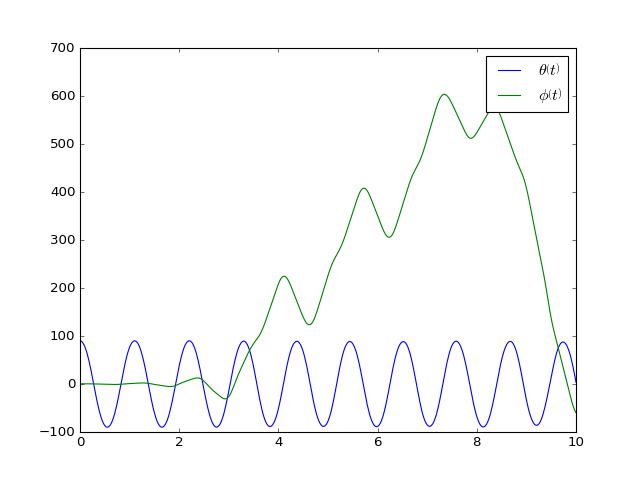

In [97]:
plt.plot(sys.times, np.rad2deg(x[:, :2]))
plt.legend([sym.latex(s, mode='inline') for s in sys.coordinates])

In [98]:
from pydy.viz import Cylinder, Plane, VisualizationFrame, Scene

rod_shape = Cylinder(2 * lA, 0.005, color='red')
plate_shape = Plane(h, w, color='blue')

v1 = VisualizationFrame('rod',
                        A.orientnew('rod', 'Axis', (sym.pi / 2, A.x)),
                        Ao,
                        rod_shape)

v2 = VisualizationFrame('plate',
                        B.orientnew('plate', 'Axis', (sym.pi / 2, B.y)),
                        Bo,
                        plate_shape)

scene = Scene(N, No, v1, v2, system=sys)


In [99]:
scene.display_ipython()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>